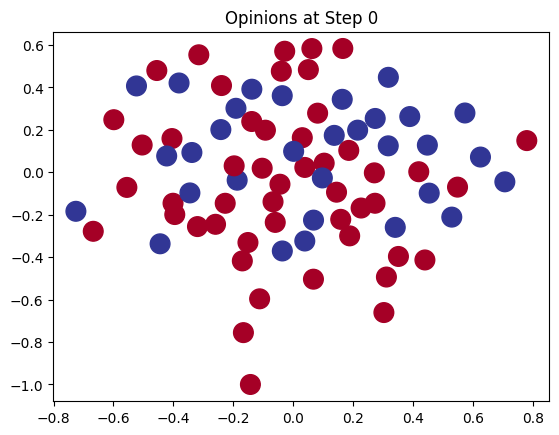

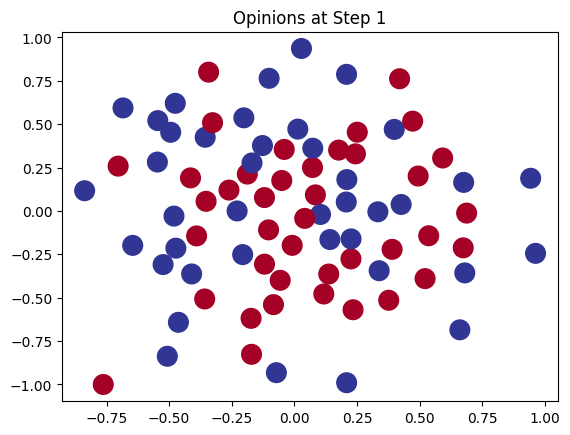

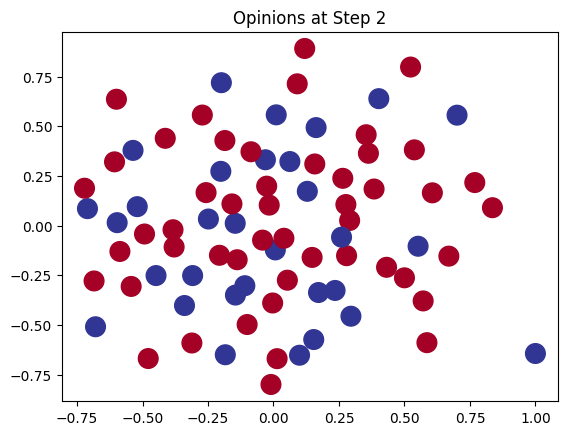

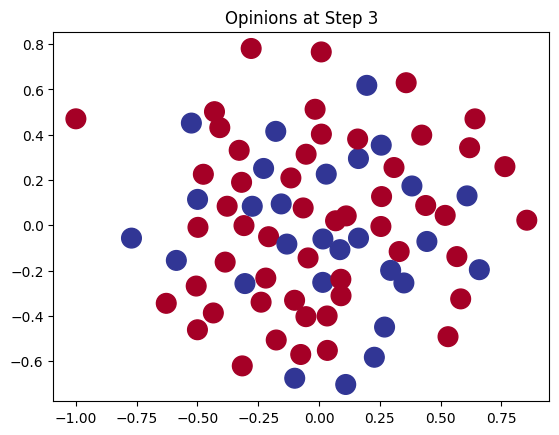

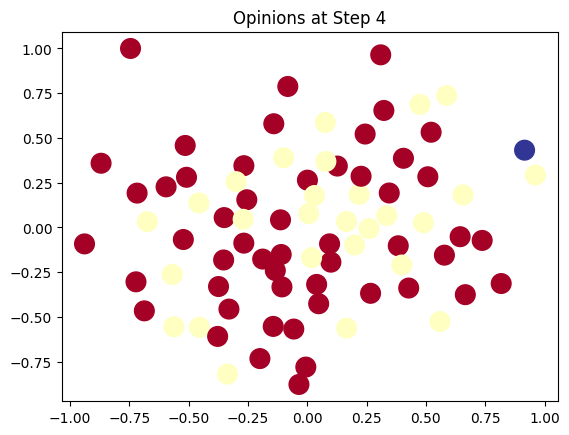

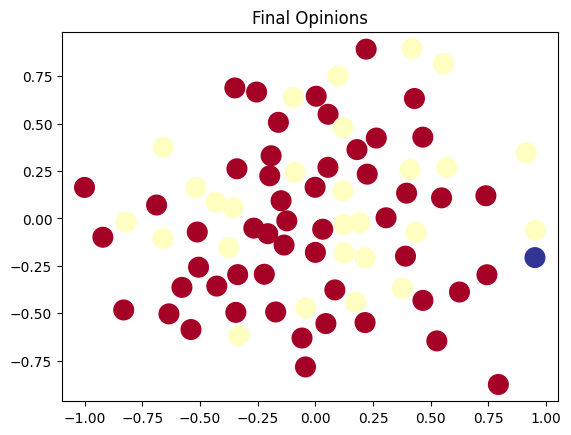

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Function to update opinions based on neighbors' opinions
def update_opinions(graph, opinions, opinion_leaders, media_influence):
    new_opinions = opinions.copy()

    for node in graph.nodes():
        neighbors_opinions = opinions[list(graph.neighbors(node))]
        if node in opinion_leaders:
            new_opinions[node] = np.mean(neighbors_opinions) * 0.6 + 0.2 * opinions[node]
        else:
            new_opinions[node] = np.mean(neighbors_opinions)

        # Media influence
        media_opinion = np.random.choice([0, 1], p=[1 - media_influence, media_influence])
        new_opinions[node] += media_opinion

    return new_opinions

# Simulation parameters
num_individuals = 80
num_opinion_leaders = 6
media_influence = 0.4
num_steps = 5

# Random graph representing social connections
social_network = nx.erdos_renyi_graph(num_individuals, 0.1)

# Initialize opinions and opinion leaders
opinions = np.random.choice([0, 1], size=num_individuals)
opinion_leaders = np.random.choice(range(num_individuals), size=num_opinion_leaders, replace=True)

# Simulation loop
for step in range(num_steps):
    # Update opinions
    opinions = update_opinions(social_network, opinions, opinion_leaders, media_influence)

    # Plot opinions at each step
    plt.figure()
    pos = nx.spring_layout(social_network)
    colors = opinions
    sizes = 200
    cmap = plt.cm.RdYlBu

    x_pos = [pos[node][0] for node in social_network.nodes()]
    y_pos = [pos[node][1] for node in social_network.nodes()]

    plt.scatter(x_pos, y_pos, c=colors, s=sizes, cmap=cmap)
    plt.title(f"Opinions at Step {step}")
    plt.show()

# Plot the final state
plt.figure()
pos = nx.spring_layout(social_network)
colors = opinions
sizes = 200
cmap = plt.cm.RdYlBu

x_pos = [pos[node][0] for node in social_network.nodes()]
y_pos = [pos[node][1] for node in social_network.nodes()]

plt.scatter(x_pos, y_pos, c=colors, s=sizes, cmap=cmap)
plt.title(f"Final Opinions")
plt.show()
